In [1]:
import numpy as np
import pandas as pd
import pickle
import sklearn


In [31]:
# Saves a model or any other python object as a file
# Useful so you don't have to re-run something that takes a long time to run
def save_model(model, filename):
    with open(filename, 'wb') as f:
        pickle.dump(model, f)


# Returns a model or other python object from a given file
def get_model(filename):
    with open(filename, 'rb') as f:
        mod = pickle.load(f)
    return mod

In [125]:
#sklearn.show_versions()

In [3]:
df = pd.read_csv("combined_data.csv")

In [4]:
df.columns

Index(['title', 'publishedAt', 'channelTitle', 'categoryId', 'trending_date',
       'tags', 'view_count', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'description', 'titleLen',
       'descriptionLen', 'titleSentiment', 'descriptionSentiment',
       'titleReadabilityConsensus', 'descriptionReadabilityConsensus',
       'titleForeignReadability', 'descriptionForeignReadability',
       'titleTimeToRead', 'descriptionTimeToRead', 'descriptionSyllableCount',
       'titleSyllableCount', 'avgTagSentiment', 'avgTagReadabilityConsensus',
       'avgTagForeignReadability', 'avgTagSyllableCount', 'HoursFromMidnight',
       'PublishWeekday', 'PublishMonth', 'daysToTrend', 'viewsPerDay',
       'isTopViewsPerDay', 'numTags', 'CategoryName', 'descriptionWordCount',
       'titleWordCount'],
      dtype='object')

In [4]:
model_features = ['comments_disabled', 'ratings_disabled', 'titleLen', 'descriptionLen', 'titleSentiment',
                  'descriptionSentiment', 'titleReadabilityConsensus', 'descriptionReadabilityConsensus',
                  'titleForeignReadability', 'descriptionForeignReadability', 'titleTimeToRead',
                  'descriptionTimeToRead', 'descriptionSyllableCount', 'titleSyllableCount', 'avgTagSentiment',
                  'avgTagReadabilityConsensus', 'avgTagForeignReadability', 'avgTagSyllableCount', 
                  'HoursFromMidnight', 'PublishWeekday', 'PublishMonth', 'numTags', 'CategoryName',
                  'descriptionWordCount', 'titleWordCount']

In [5]:
X = df[model_features]

In [6]:
y = df['isTopViewsPerDay']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
TEST_SIZE = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=2025)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier


In [32]:
# Transform booleans to numerics
X_train['comments_disabled'] = X_train['comments_disabled'].astype(int)
X_train['ratings_disabled'] = X_train['ratings_disabled'].astype(int)
X_test['comments_disabled'] = X_test['comments_disabled'].astype(int)
X_test['ratings_disabled'] = X_test['ratings_disabled'].astype(int)


In [11]:
# Basically one-hot encoding of categorical variables
categoricals = ['PublishWeekday', 'PublishMonth', 'CategoryName']
for cat in categoricals:
    df_dummies = pd.get_dummies(X_train[cat])
    df_dummies = df_dummies.astype(int)
    X_train = pd.concat([X_train, df_dummies], axis=1)  

    df_dummies = pd.get_dummies(X_test[cat])
    df_dummies = df_dummies.astype(int)
    X_test = pd.concat([X_test, df_dummies], axis=1)  
    
X_train.drop(categoricals, axis=1, inplace=True)
X_test.drop(categoricals, axis=1, inplace=True)

In [44]:
#clf = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=2025).fit(X_train, y_train)

# could increase n_estimators
# tune max_depth for best performance according to sklearn documentation



In [45]:
#save_model(clf, 'BasicGradientBoosting.pkl')

In [27]:
# Above cells with commented out code show how the model was obtained
clf = get_model('BasicGradientBoosting.pkl')

In [47]:
len(clf.feature_importances_)

56

In [48]:
len(X_train.columns)

56

In [13]:
feature_importances = {}
for i in range(len(X_train.columns)):
    feature_importances[X_train.columns[i]] = clf.feature_importances_[i]
sorted_importance = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))
sorted_importance    

{'HoursFromMidnight': np.float64(0.16295959748172248),
 'avgTagSyllableCount': np.float64(0.07279711265018136),
 'avgTagReadabilityConsensus': np.float64(0.07009217025244226),
 'avgTagForeignReadability': np.float64(0.06743687288680111),
 'descriptionTimeToRead': np.float64(0.0544161591406096),
 'Music': np.float64(0.052674393186141026),
 'numTags': np.float64(0.051981722932709196),
 'Sports': np.float64(0.04325735465666994),
 'titleLen': np.float64(0.04306684630910407),
 'descriptionForeignReadability': np.float64(0.04276263719279173),
 'titleWordCount': np.float64(0.04021920853553569),
 'avgTagSentiment': np.float64(0.03472820747767034),
 'descriptionLen': np.float64(0.02070718398906418),
 'Film & Animation': np.float64(0.019809722090328823),
 'descriptionWordCount': np.float64(0.01926802409519918),
 'Entertainment': np.float64(0.019053260739970667),
 'descriptionSentiment': np.float64(0.017328945751832643),
 'descriptionReadabilityConsensus': np.float64(0.015593496703847508),
 'Peop

In [14]:
from sklearn.inspection import permutation_importance
#rslt = permutation_importance(clf, X_train, y_train, n_repeats=15,
                                #random_state=2025)

In [28]:
#save_model(rslt, 'gradientBoostingImportances.pkl')

# Comment out code above in this cell and above cell show how rslt was obtained

rslt = get_model('gradientBoostingImportances.pkl')

In [20]:
# According to sklearn documentation, permutation_importance is better for data with many unique values
# because it takes that into account while feature_importances_ does not
feature_importances = {}
for i in range(len(X_train.columns)):
    feature_importances[X_train.columns[i]] = abs(rslt.importances_mean[i])
sorted_importance = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))
sorted_importance

{'avgTagSyllableCount': np.float64(0.0017400139709150924),
 'avgTagReadabilityConsensus': np.float64(0.0014005553727405604),
 'numTags': np.float64(0.0010483959426615213),
 'Music': np.float64(0.0009109960338765655),
 'HoursFromMidnight': np.float64(0.0008532649797652781),
 'descriptionTimeToRead': np.float64(0.0007181743131447889),
 'avgTagSentiment': np.float64(0.0005172702448374163),
 'titleWordCount': np.float64(0.0004214366950126077),
 'avgTagForeignReadability': np.float64(0.00039372578903916396),
 'Entertainment': np.float64(0.0003706333673946534),
 'descriptionForeignReadability': np.float64(0.0002921191338032629),
 'titleLen': np.float64(0.0002724905754054226),
 'descriptionLen': np.float64(0.0002366973218564198),
 'titleForeignReadability': np.float64(0.00022053262670525728),
 'descriptionSyllableCount': np.float64(0.00022053262670524988),
 'Sports': np.float64(0.00016164695151169953),
 'Film & Animation': np.float64(0.00016049233042947364),
 'descriptionReadabilityConsensus'

In [17]:
X_train.columns

Index(['comments_disabled', 'ratings_disabled', 'titleLen', 'descriptionLen',
       'titleSentiment', 'descriptionSentiment', 'titleReadabilityConsensus',
       'descriptionReadabilityConsensus', 'titleForeignReadability',
       'descriptionForeignReadability', 'titleTimeToRead',
       'descriptionTimeToRead', 'descriptionSyllableCount',
       'titleSyllableCount', 'avgTagSentiment', 'avgTagReadabilityConsensus',
       'avgTagForeignReadability', 'avgTagSyllableCount', 'HoursFromMidnight',
       'numTags', 'descriptionWordCount', 'titleWordCount', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'April',
       'August', 'December', 'February', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Autos & Vehicles', 'Comedy',
       'Education', 'Entertainment', 'Film & Animation', 'Gaming',
       'Howto & Style', 'Music', 'News & Politics', 'Nonprofits & Activism',
       'People & Blogs', 'Pets & Animals', '

In [18]:
X_train.head()

,comments_disabled,ratings_disabled,titleLen,descriptionLen,titleSentiment,descriptionSentiment,titleReadabilityConsensus,descriptionReadabilityConsensus,titleForeignReadability,descriptionForeignReadability,...,Gaming,Howto & Style,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Sports,Travel & Events
68807,0,0,44,381,0.00,0.11,4.0,9.0,13.0,11.2,...,0,0,0,0,0,0,0,0,0,0
8151,0,0,54,1178,0.00,0.36,4.0,11.0,14.0,14.7,...,1,0,0,0,0,0,0,0,0,0
25369,0,0,54,1511,-0.25,0.22,10.0,11.0,9.0,10.8,...,0,1,0,0,0,0,0,0,0,0
14406,0,0,59,1363,0.00,0.20,9.0,13.0,15.0,25.1,...,0,0,0,0,0,0,0,0,1,0
61185,0,0,56,931,-0.80,0.39,4.0,23.0,15.0,8.1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.metrics import accuracy_score
clf = get_model('BasicGradientBoosting.pkl')
precisionRecallF1 = sklearn.metrics.precision_recall_fscore_support(y_true=y_test, y_pred=clf.predict(X_test), average='weighted')
print("Accuracy score: ", accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))
print("Precision: ", precisionRecallF1[0])
print("Recall: ", precisionRecallF1[1])
print("F1 Score: ", precisionRecallF1[2])

Accuracy score:  0.8563808292249252
Precision:  0.8573628298676144
Recall:  0.8563808292249252
F1 Score:  0.7945748570133867


In [29]:
from sklearn.model_selection import GridSearchCV
"""
gb = GradientBoostingClassifier(random_state=2025)#.fit(X_train, y_train)

print("begin")
clf = GridSearchCV(gb, {'max_depth':[1, 3, 10, 12, 15],
                        'n_estimators':[1, 10, 100, 125, 150]})
clf.fit(X_train, y_train)
save_model(clf, 'GradientBoostingAfterValidation.pkl')
"""

# Commented out above code shows how model was obtained,
# It took very long to run

clf = get_model('GradientBoostingAfterValidation.pkl')

In [30]:
clf # best is max_depth=15, n_estimators=150

GridSearchCV(estimator=GradientBoostingClassifier(random_state=2025),
             param_grid={'max_depth': [1, 3, 10, 12, 15],
                         'n_estimators': [1, 10, 100, 125, 150]})

In [ ]:
from sklearn.metrics import accuracy_score
clf = get_model('GradientBoostingAfterValidation.pkl')
precisionRecallF1 = sklearn.metrics.precision_recall_fscore_support(y_true=y_test, y_pred=clf.predict(X_test), average='weighted')
print("Accuracy score: ", accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))
print("Precision: ", precisionRecallF1[0])
print("Recall: ", precisionRecallF1[1])
print("F1 Score: ", precisionRecallF1[2])

Accuracy score:  0.871938899216035
Precision:  0.8551546533023695
Recall:  0.871938899216035
F1 Score:  0.8409936484410316


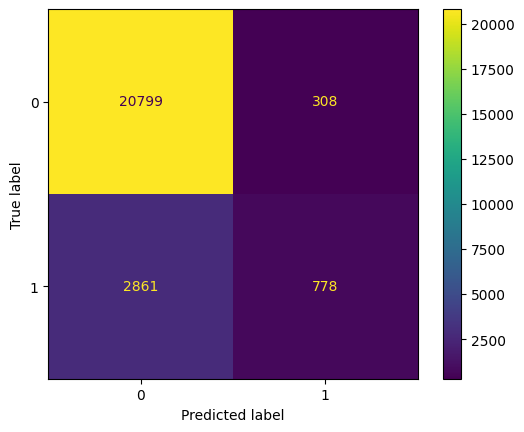

In [25]:
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=clf.predict(X_test))

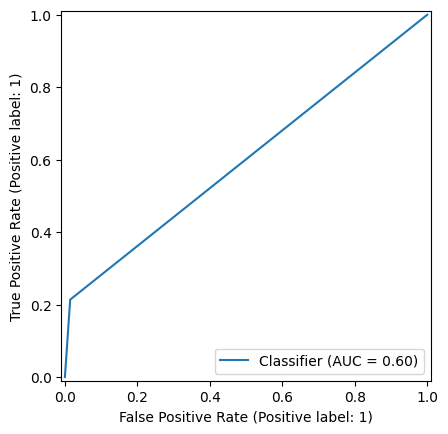

In [26]:
sklearn.metrics.RocCurveDisplay.from_predictions(y_true=y_test, y_pred=clf.predict(X_test))

In [13]:
#clf = get_model('GradientBoostingAfterValidation.pkl')
#print("begin")

# This is to generate a learning curve graph, ran it for about 2 hours and it still didn't finish
#sklearn.model_selection.learning_curve(clf, X_train, y_train)
